In [2]:
#loading necessary libraries
library(tidyverse)
library(recipes)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘recipes’


The following object is masked from ‘package:stringr’:

    fixed


The following object is masked from ‘package:stats’:

    step




# Dataset Descriptions
## What is the dataset about?
This dataset was collected by the Pacific Laboratory for Artificial Intelligence (PLAI) led by Frank Wood at the University of British Columbia. The data collected revolves around how people play video games and was recorded through a MineCraft server ,set up by the research team, where players' actions are recorded as they navigate through a MineCraft world.  

#### players.csv
This original file contains 196 observations and 7 variables which are explained below  

1. **experience**: classifies a players experience into 5 categories: Pro, Veteran, Amateur, Regular and Beginner. The datatype is in character form.        
2. **susbcribe**: TRUE if player has subscribed to newsletter and FALSE otherwise. This column is of the logical data type.  
3. **hashedEmail**: encrypted email address of player. This column is of the character data type.  
4. **played_hours**: number of hours spent on the game by the player. The values in this column are a double data type.  
5. **name**: name of player. Values in this column are of the character data type.  
6. **gender**: gender of player with unique values: Male , Female, Non-binary, Prefer not to say, Agender, Two-Spirited, Other. This column is of the character data type.   
7. **Age of player**: age of the player and values in this column are of the double data type.



### Potential issues with players.csv 

1.The "experience" variable is in the character data type format; it should be changed to the factor data format.  

2.The "hashedEmail" variable should be deleted because it exposes players' identities.  

3.The "gender" variable is a character type data; it should be changed to the factor data type.  

4.The "name" variable should be deleted because it personally identifies players.
        

In [3]:
download.file("https://raw.githubusercontent.com/tahsansamin/project_planning_stage_individual/refs/heads/main/dataset/sessions.csv", "sessions.csv")
download.file("https://raw.githubusercontent.com/tahsansamin/project_planning_stage_individual/refs/heads/main/dataset/players.csv", "players.csv")

In [15]:
players <- read_csv("players.csv", show_col_types = FALSE)
head(players)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


#### sessions.csv
This original file consists of 1535 observations and the following 5 variables:  

1. **hashedEmail** : hashed email address of players in character data type format
2. **start_time** : records date and time of when player started gaming session. Current data type in character format.
3. **end_time** : records date and time of when player stopped gaming session. Current data type in character format.
4.  **original_start_time** : unix timestamp (in seconds) of when player started session. The datatype in this column is of the double data type. 
5. **original_end_time** : unix timestamp (in seconds) of when player ended gaming session. The datatype in this column is of the double data type.
    
The difference between the original_end_time and the original_start_time can be used to easily calculate the duration of the playing session to a greater degree of accuracy than the start_time and end_time variables

In [18]:
sessions <- read_csv("sessions.csv", show_col_types = FALSE)
head(sessions)

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


### Potential issues with sessions.csv 

1.The start_time and end_time variables both include the date and the time in their columns. They should each be split into seperate columns for start/end date and start/end time and each of those should be formatted into either the date or time data type 

2.The "hashedEmail" variable should be deleted because it exposes players' identities.  


### Summary Statistics

#### Players.csv

| Variable | Minimum | Maximum | Mean |
| -------- | ------- | -------- | -----|
| Age | 9 | 58 | 21.14 |
| played_hours | 0 | 223.10 | 5.85 |

There could be an issue of outliers in the played_hours variable because it has a range of 0 to 223.10 hours but a mean of 5.85 hours

#### sessions.csv
Note: Some of the statistics for original_start_time and original_end_time have been reported to more than two decimal places because reporting them to two decimal places makes it seem that it is the same value as another summary statistic whereas the difference between the two is too minute to be displayed with two decimal places. However, do note that the minimum for both original_start_time and original_end_time are the same and hence have been reported to two decimal places.

| Variable | Minimum | Maximum | Mean |
| -------- | ------- | -------- | -----|
| original_start_time | 1.71e+12 | 1.72733e+12	 | 1.719201e+12	 |
| original_end_time | 1.71e+12 | 1.72734e+12 | 1.719196e+12 |


In [6]:
summary_stats_players <- players |> 
                summarise(min_Age = min(Age, na.rm = TRUE),max_Age = max(Age, na.rm = TRUE),mean_age = mean(Age, na.rm = TRUE), min_played_hours = min(played_hours),max_played_hours = max(played_hours), 
                         , mean_played_hours = mean(played_hours, na.rm = TRUE))
summary_stats_players
summary_stats_sessions <- sessions |> 
                summarise(min_original_start_time = min(original_start_time, na.rm = TRUE), max_original_start_time = max(original_start_time, na.rm = TRUE), mean_original_start_time = mean(original_start_time, na.rm = TRUE),
                         min_original_end_time = min(original_end_time, na.rm = TRUE), max_original_end_time = max(original_end_time, na.rm = TRUE), mean_original_end_time = mean(original_end_time, na.rm = TRUE))

summary_stats_sessions

min_Age,max_Age,mean_age,min_played_hours,max_played_hours,mean_played_hours
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9,58,21.13918,0,223.1,5.845918


min_original_start_time,max_original_start_time,mean_original_start_time,min_original_end_time,max_original_end_time,mean_original_end_time
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.7124e+12,1.72733e+12,1.719201e+12,1.7124e+12,1.72734e+12,1.719196e+12


There are two NA values in players.csv and 4 NA values in sessions.csv

In [23]:
na_players <- sum(is.na(players))
na_sessions <- sum(is.na(sessions))
na_players
na_sessions

[1] 2

[1] 4

# Questions
The **broad question** that will be explored is:
        *What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ            between various player types?* More **specifically** *can player age and number of hours played be used to predict their newsletter subscription status?*

In order to answer this question the players.csv file will be used because it contains the player age, number of hours played and the subscription status variable. First, the name and hashed email's of all the players will be removed to keep the data confidential. Also , the player experience variable will be changed to be a factor data format. Next, the rows that have NA or missing values for player age , number of hours played and newsletter subscription status will be removed because there are not many NA or missing values so removing them is very unlikely to cause loss of valuable data. After that, the hours played and age variables will be standardized so no one variable takes more weight in prediction that the other. Finally, the K nearest-neighbors algorithm will be applied to predict a player's newsletter susbcription status based on their age and the number of hours they have played.

# Explaratory Data Analysis and Visualizations

In [42]:
tidy_players <- drop_na(players)
head(tidy_players)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


#### Table Summarizing mean of quantitative variables
| Variable | Mean |
-----------|--------|
| played_hours | 5.85|
| Age | 21.14|  



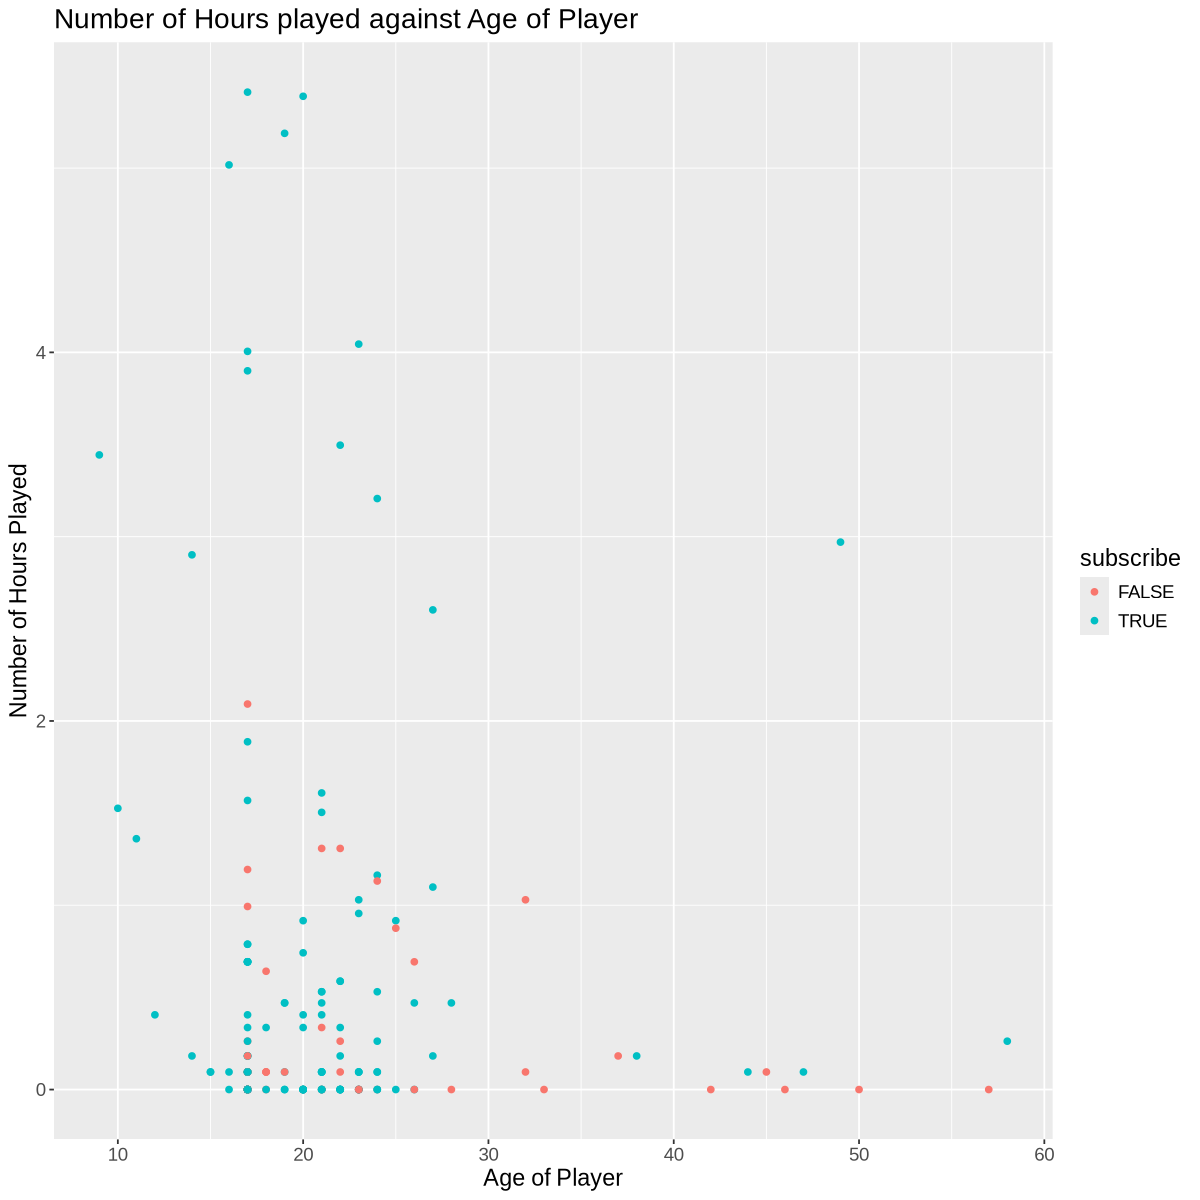

In [35]:
figure_1 <- tidy_players |>
            ggplot(aes(x = Age, y= log1p(played_hours), color = subscribe)) +
            geom_point() +
            labs(x = "Age of Player", y = "Number of Hours Played", title = "Number of Hours played against Age of Player") +
            theme(text = element_text(size = 14)) 

figure_1

The visualization shows a trend that younger players have higher number of hours played. It also seems that the observations with the highest number of hours played are all subscribed. However there seems to be a data imbalance with fewer observations for higher ages and fewer observations where the susbcription status is false.  This is will have to be dealt with so as not to bias the KNN model.

### Visualization 2: age of players who are susbcribed versus age of players who are not susbcribed

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


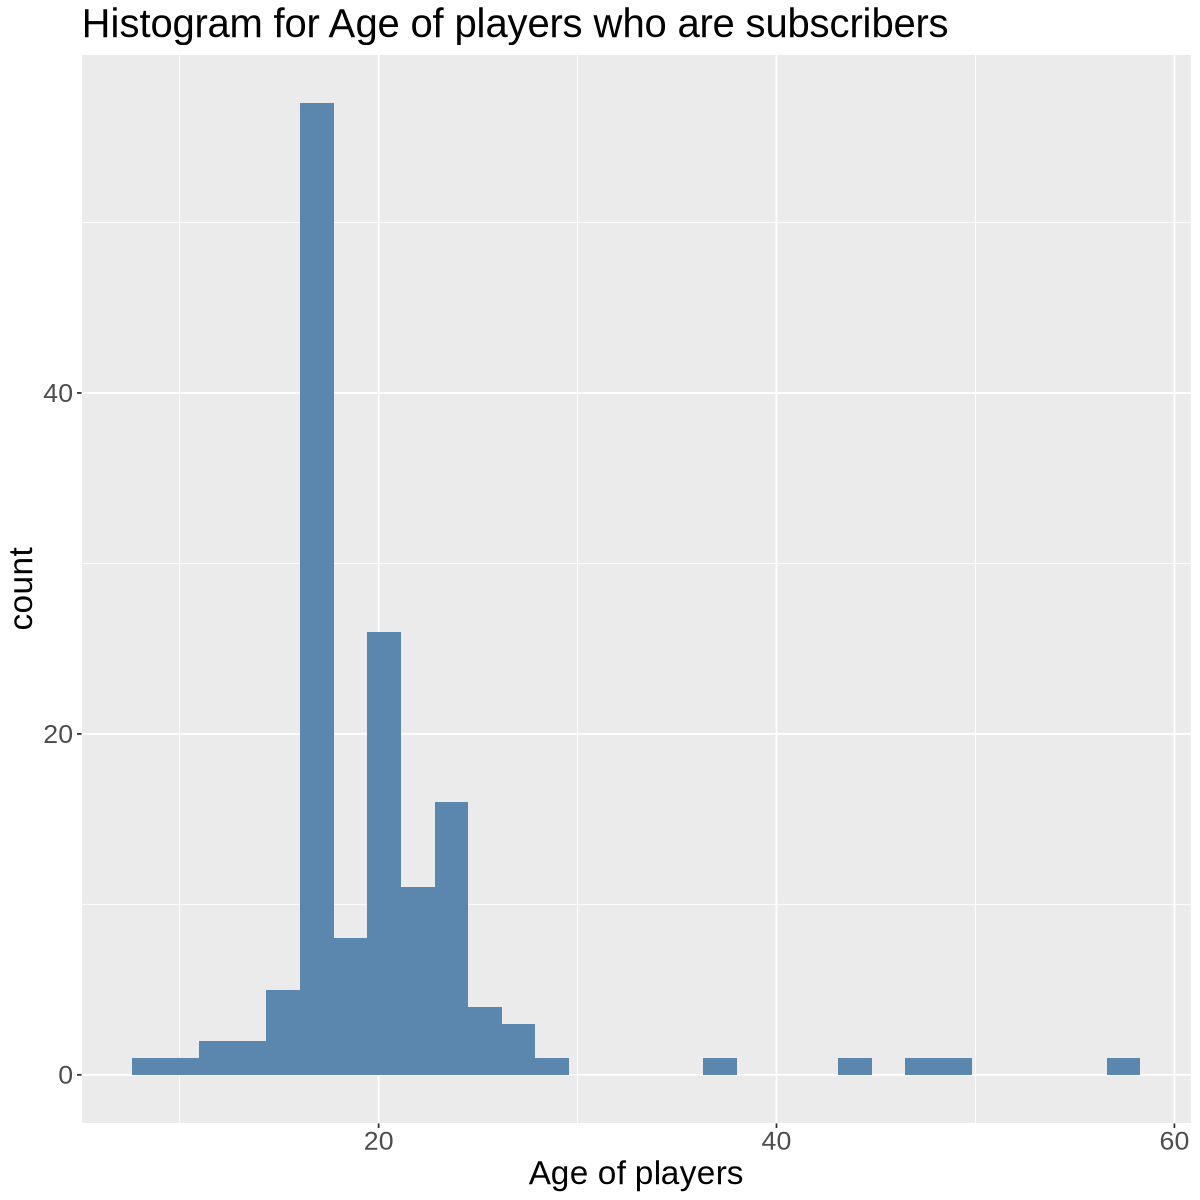

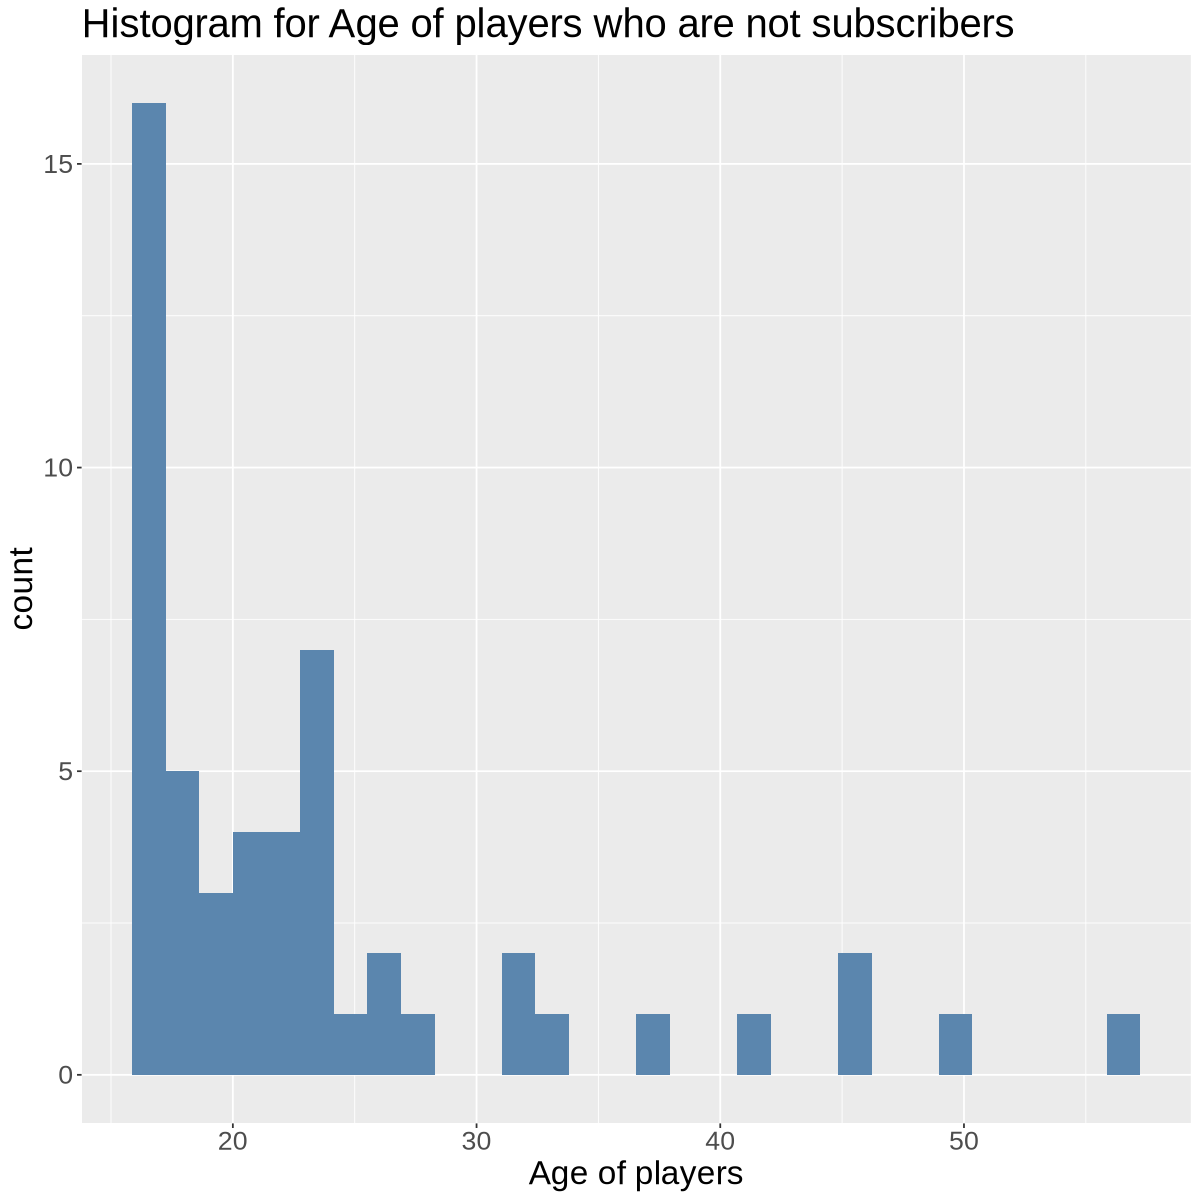

In [28]:
options(repr.plot.width = 10, repr.plot.height = 10)
hist_1 <- filter(tidy_players, subscribe == TRUE) |>
            ggplot(aes(x = Age)) +
            geom_histogram(fill = "#5B86AE") +
            
            labs(x = "Age of players", title = "Histogram for Age of players who are subscribers")+
            theme(text = element_text(size = 20))

hist_2 <- filter(tidy_players, subscribe == FALSE) |>
            ggplot(aes(x = Age)) +
            geom_histogram(fill = "#5B86AE") +
            labs(x = "Age of players", title = "Histogram for Age of players who are not subscribers") +
            theme(text = element_text(size = 20))
            

hist_1
hist_2

This histograms above highlight that players who are susbcribed are mostly in their late teens to early twenties(histogram 1). Majority of players who are not susbcribed tend to be younger than the late teens period (histogram 2).

### Visualization 3: Mean number of hours played for each subscription group

Warning message in geom_text(aes(label = format(round(mean_hours, 2)), figures = 2), :
“Ignoring unknown aesthetics: figures”


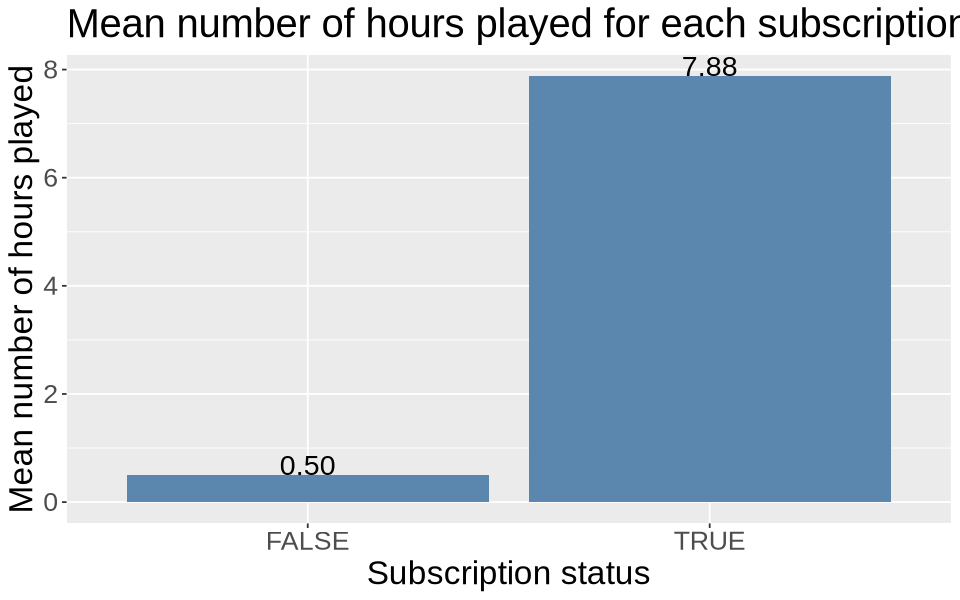

In [57]:
means_for_subscription_status <- tidy_players |>
            group_by(subscribe) |>
            summarise(mean_hours  = mean(played_hours)) |> 
            ggplot(aes(x = subscribe, y = mean_hours)) +
            geom_bar(stat = "identity", fill = "#5B86AE") +
            geom_text(aes(label = format(round(mean_hours, 2)), figures = 2), vjust = 0, size = 6)+
            labs(x = "Subscription status", y = "Mean number of hours played", title = "Mean number of hours played for each subscription group")+
            theme(text = element_text(size = 20))

means_for_subscription_status


The above graph indicates that players who are subscribed have a much higher mean playing time versus players who are not subscribed (7.88 hours versus 0.50 hours)

### Visualization 4: Mean age for each subscription status

Warning message in geom_text(aes(label = format(round(mean_age, 2)), figures = 2), :
“Ignoring unknown aesthetics: figures”


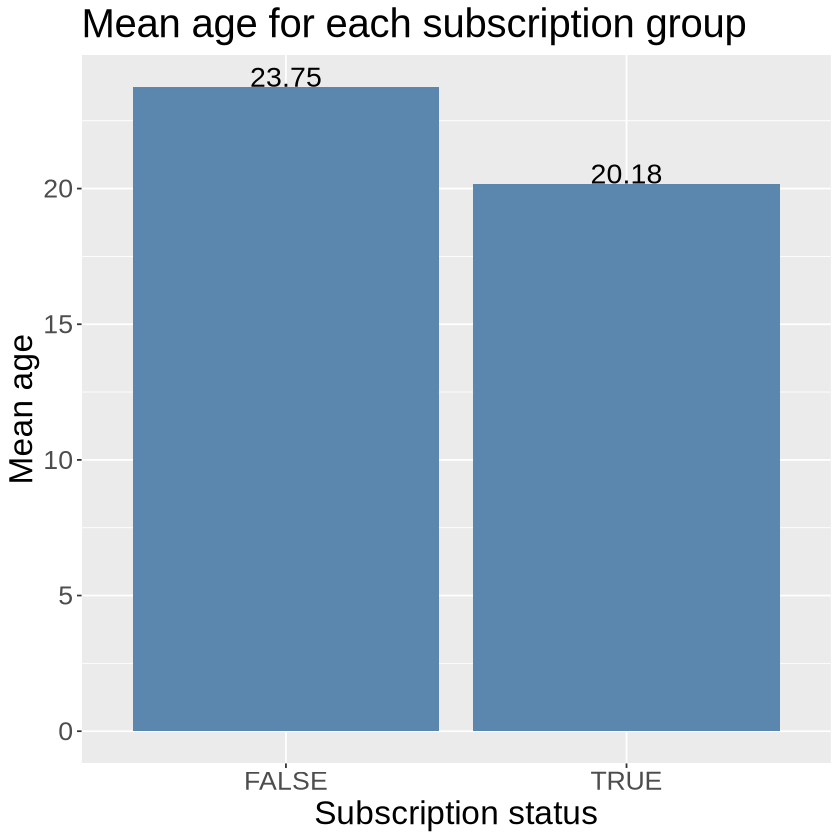

In [13]:
means_for_subscription_status0 <- tidy_players |>
            group_by(subscribe) |>
            summarise(mean_age  = mean(Age)) |> 
            ggplot(aes(x = subscribe, y = mean_age)) +
            geom_bar(stat = "identity", fill = "#5B86AE") +
            geom_text(aes(label = format(round(mean_age, 2)), figures = 2), vjust = 0, size = 6)+
            labs(x = "Subscription status", y = "Mean age", title = "Mean age for each subscription group")+
            theme(text = element_text(size = 20))

means_for_subscription_status0

The graph shows a small difference between mean age for those subscribed versus those who are not. This could potentially be due to fewer observations in the dataset for older players

### Visualization 5: Mean number of hours played per age group

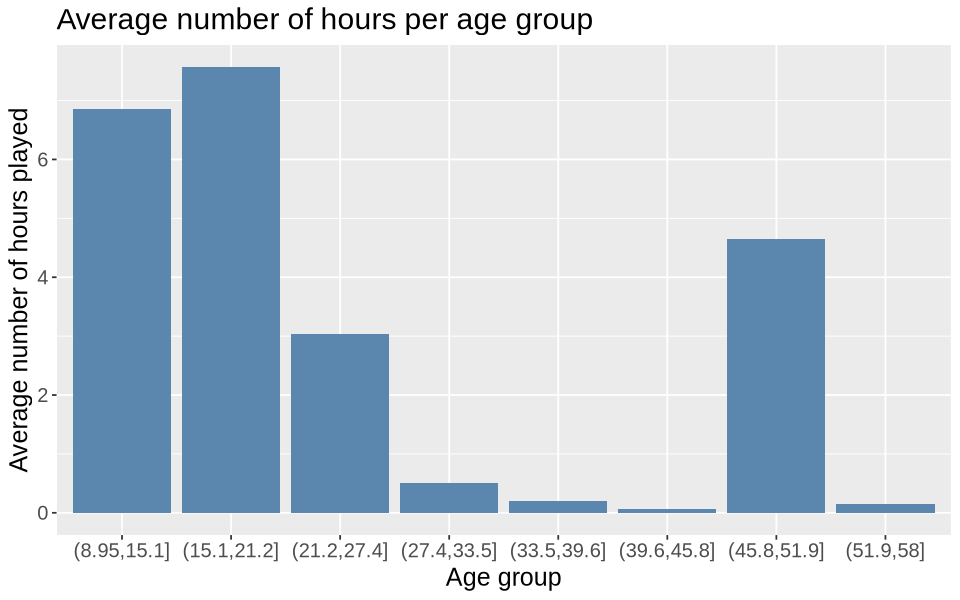

In [58]:
options(repr.plot.width = 8, repr.plot.height = 5)
hoursperage <- tidy_players |>
                   mutate(age_grp = cut(Age, breaks = 8)) |>
                    group_by(age_grp) |>
                    summarise(mean_hours = mean(played_hours)) |>
                    ggplot(aes(x = age_grp, y = mean_hours)) +
                    geom_bar(stat = "identity", fill = "#5B86AE") +
                    labs(x = "Age group", y = "Average number of hours played", title = "Average number of hours per age group")+
                    theme(text = element_text(size = 15))
hoursperage

The general trend shows that the number of hours played decreases with age with a few exceptions such as the age range 45.8 - 51.9 and 15.1 - 21.2

# Methods and Planning

For this project a the K nearest neighbor algorithm will be used for classification. This is appropriate because the two variables of interest(hours played and age of player) are numerical. Also predicting the subscription status of a player is a classification problem so KNN classification would be appropriate. Furthermore, KNN is baesd on similarity of nearby points, so general trends in player behaviour patterns can be better understood. Another crucial aspect is that the KNN algorithm requires few assumptions of what data must look like.

##### Assumptions of the model
The KNN algorithm has few assumptions. Noteably, it assumes that the closer two given data points are the more related and similar they are to each other

##### Limitations of KNN classification
First, KNN is computationally efficient for large datasets which means that it would take more time to train. Furthermore, KNN classification may not perform well if the classes are imbalanced such as if the dataset constitutes more subscribers than subscribers. In this case the KNN algorithm would in many cases predict the class of the data point as the class with the highest number of occurences which may not always be right. 

##### How to compare and select the model?
5 fold cross validation with a range of values of K will be used to select the model based on the model with the highest cross validation accuracy.

##### Data preprocessing
The dataset players.csv will be split into a training and testing set with training data taking 75% of the original data and testing taking the remaining 25%. Splitting will be performed after removing confidential information from data, removing NA values and changing data type of some columns to another more appropriate data type.  Cross validation will be performed with 5 folds and a range of K values to determine which K is best.